# GP 112 Measurements - Session -2 : Python tutorial

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# no need to use this line if you don't use jupyter note book 
%matplotlib inline

In [7]:
import librosa
import IPython.display as ipd

## Activity 14

#### The elevation of a cricket ball after it hits the ground (point G) is given in bit.ly/GP112_HAWKEYE . The ball hits the pad at a distance of 80 cm from the point G. If the wicket is at 120 cm from point G, calculate the elevation of the ball when it hits the wicket 

## Activity 15

#### (a). Let N=5 and V = 0, 100, 80, 60, 40, 20 for h=0,1,2,3,4, and 5 respectively. Also let PIh = 0.1, 0.2, 0.3, 0.4, 0.5 for h=1,2,3,4 and 5 respectively. plot x(t).

* Let f0 = 45

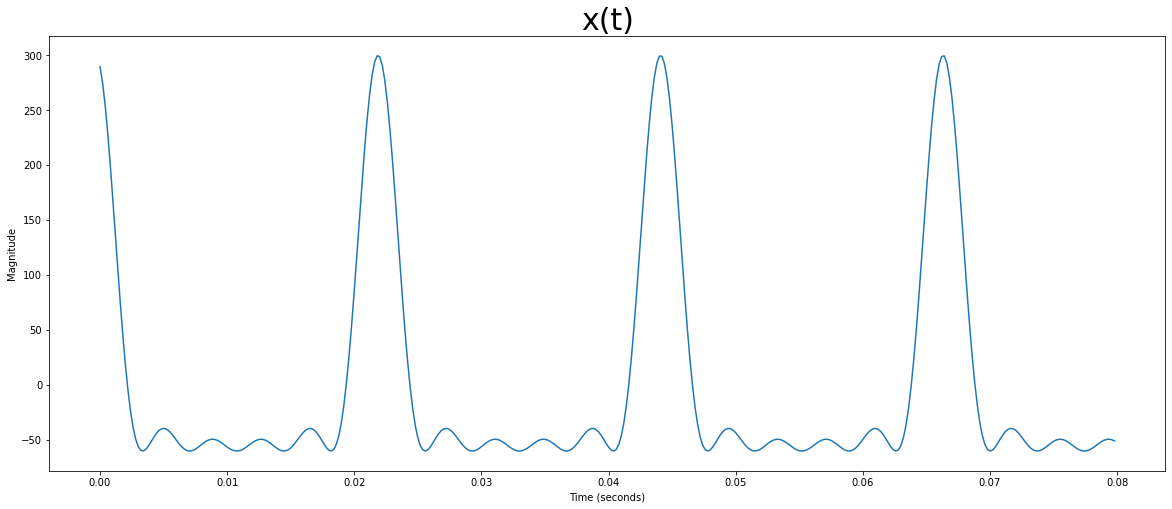

In [70]:
# define the time axis
t = np.arange(0, 0.08 , 0.0002)

# define the initial values
f0 = 45
N = 5
y = 0
h = [1, 2, 3, 4, 5]
v = [100, 80, 60, 40, 20]
PIh = [0.1, 0.2, 0.3, 0.4, 0.5]

# loop indicater
i = 0

while i < N :
    # add signlas
    y += v[i]*np.cos(2*np.pi*h[i]*f0*t+PIh[i])     

    i += 1

plt.figure(figsize=(20,8))
plt.plot(t,y)
plt.title('x(t)', fontsize = 30)
plt.xlabel('Time (seconds)')
plt.ylabel('Magnitude')
plt.show()

#### (b). Give plots for different values of V and PIh [at least 3 different plots] 

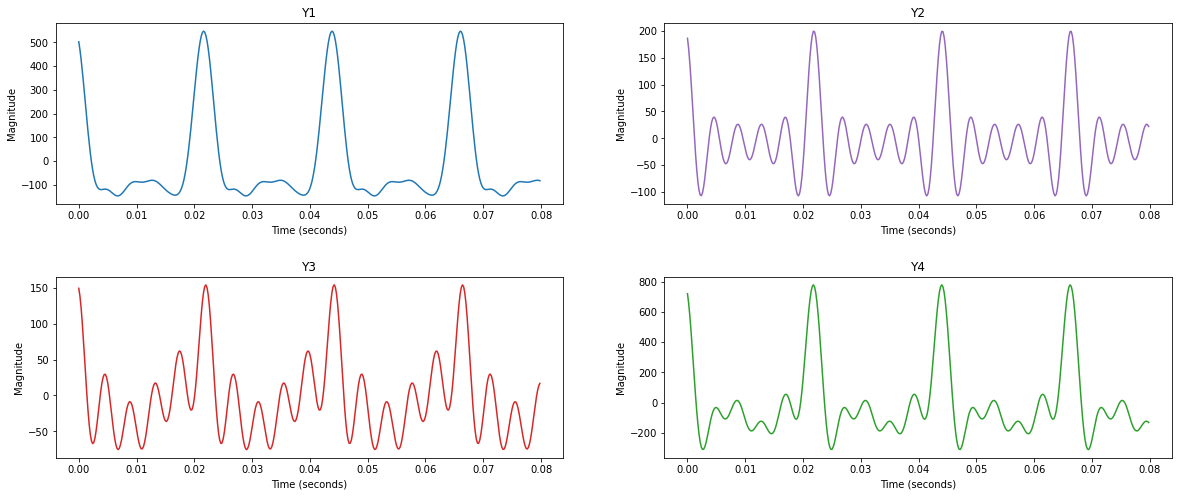

In [83]:
# define the time axis
t = np.arange(0,0.08,0.0002)

# define the initial values
h = [1, 2, 3, 4, 5]
f0 = 45
N = 5

# define values for 4 different plots
v1 = [200, 180, 100, 50, 20]
PIh1 = [0.2, 0.3, 0.6, 0.8, 0.5]
v2 = [20, 30, 40, 50, 60]
PIh2 = [0.1, 0.2, 0.3, 0.4, 0.5]
v3 = [50, 15, 20, 25, 50]
PIh3 = [0.5, 0.3, 0.4, 0.3, 0.2]
v4 = [200, 180, 160, 140, 120]
PIh4 = [0.2, 0.7, 0.3, 0.4, 0.5]

# create 4 signals
y1 = 0
y2 = 0
y3 = 0
y4 = 0


# loop indicater
i = 0

while i < N :
    # add signals 
    y1 += v1[i]*np.cos(2*np.pi*h[i]*f0*t+PIh1[i])
    y2 += v2[i]*np.cos(2*np.pi*h[i]*f0*t+PIh2[i])
    y3 += v3[i]*np.cos(2*np.pi*h[i]*f0*t+PIh3[i])
    y4 += v4[i]*np.cos(2*np.pi*h[i]*f0*t+PIh4[i])
    
    i += 1

# make subplots
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 8),
                       gridspec_kw={
                        'width_ratios': [3, 3],
                        'height_ratios': [3, 3],
                        'wspace': 0.2,
                        'hspace': 0.4})
ax[0, 0].plot(t, y1)
ax[0, 1].plot(t, y2, 'tab:purple')
ax[1, 0].plot(t, y3, 'tab:red')
ax[1, 1].plot(t, y4, 'tab:green')

# add titles
ax[0, 0].set_title("Y1")
ax[0, 1].set_title("Y2")
ax[1, 0].set_title("Y3")
ax[1, 1].set_title("Y4")

# add labels
for axs in ax.flat:
    axs.set(xlabel='Time (seconds)', ylabel='Magnitude')



plt.show()

## Import the audio

In [9]:
#load .wav sound file
#sr = sample rate = #sam[le per second, 22050 Hz
x, sr = librosa.load('violin-C4.wav')
x = x[0:(3*sr)+1]
print(type(x))
print('x length: {}'.format(len(x)))
print(type(sr))
print('sr = {}'.format(sr))

<class 'numpy.ndarray'>
x length: 66151
<class 'int'>
sr = 22050


In [10]:
# confirm the audio sample length
print('Sound clip is {} seconds long.'.format((len(x)-1)/sr))

Sound clip is 3.0 seconds long.


## Plot the graph in time domain

Text(0, 0.5, 'Pressure')

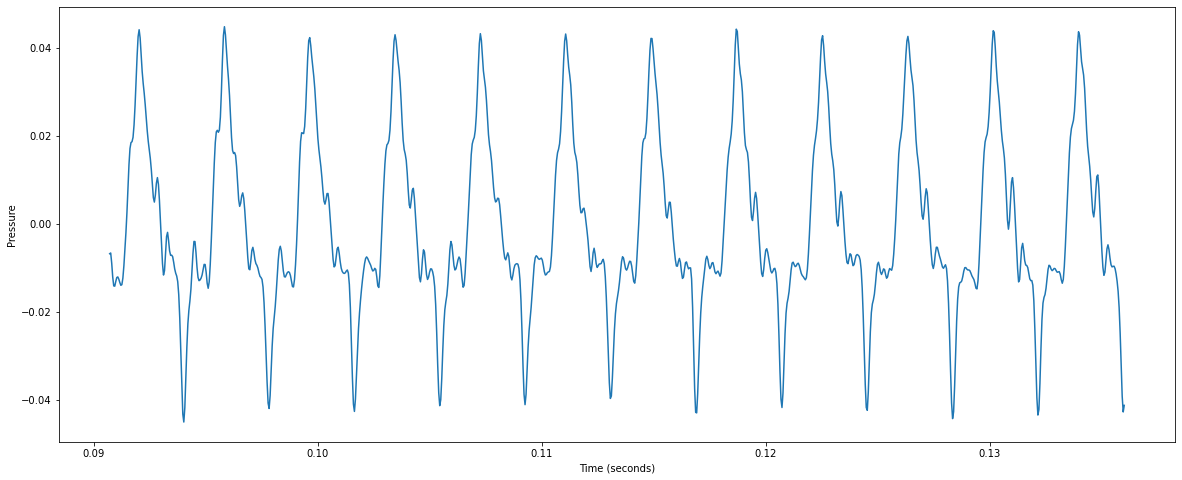

In [11]:
plt.figure(figsize=(20,8))
# Develop array 't to match x
t = np.array(range(0, len(x)))/sr
#plt.plot(t,x)
plt.plot(t[2000:3000],x[2000:3000])
plt.xlabel('Time (seconds)')
plt.ylabel('Pressure')

## Embad the audio

In [12]:
ipd.Audio(x ,rate = sr)

## Fourier transformation

In [13]:
# find the fourier transform
c = np.fft.fft(x)
print(type(c))
print(len(c))
#print the array of complex numbers
print(c[0:10])

<class 'numpy.ndarray'>
66151
[-105.52198595-3.10862447e-15j    4.50358546-4.71183184e+00j
    2.83387104-3.87256720e+00j    1.89096091-4.07505836e+00j
    0.64015351-4.07604171e+00j   -0.29418841-3.45535666e+00j
   -0.84512789-2.92568689e+00j   -1.07781596-2.38081172e+00j
   -1.21083966-1.95421703e+00j   -1.26617415-1.64000292e+00j]


## Plot the Frequency vs Amlitude Graph

### Graph for whole range

c:\Users\Public\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0, 0.5, 'Amblitude')

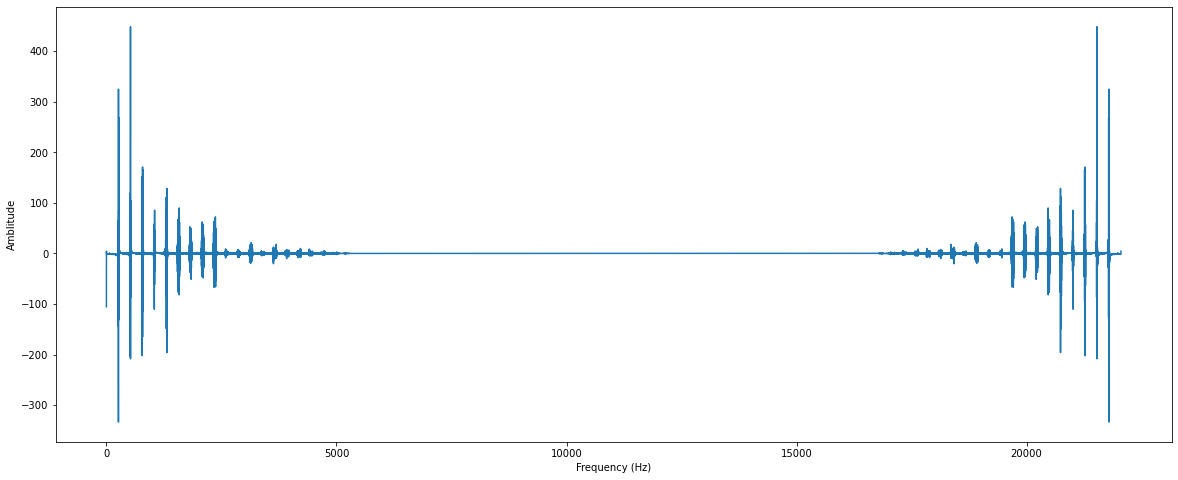

In [14]:
fr = np.array(range(0,66151))/3
# plot the absolute value
plt.figure(figsize=(20,8))
plt.plot(fr,c)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amblitude')


Text(0, 0.5, 'Amblitude')

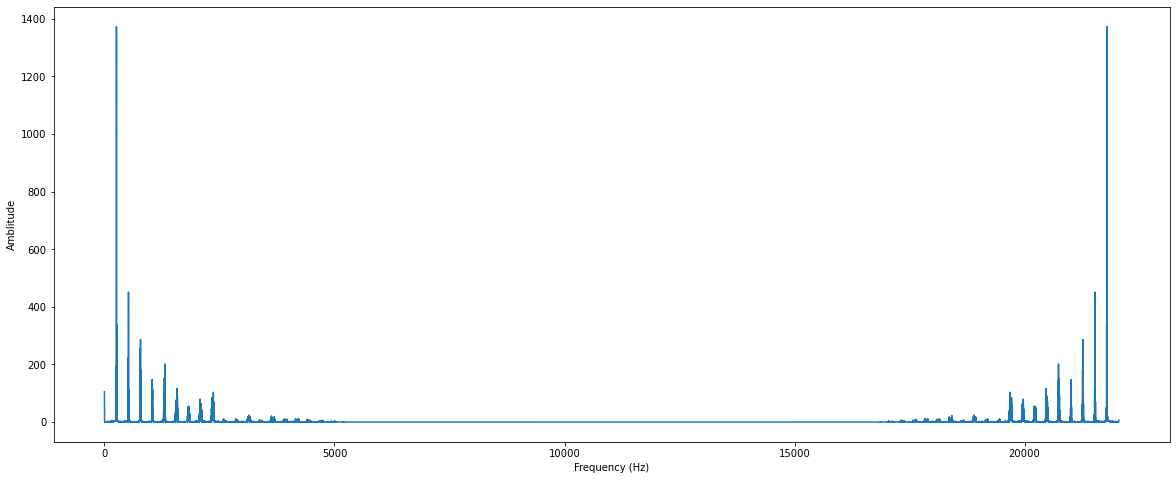

In [15]:
fr = np.array(range(0,66151))/3
# plot the absolute value
plt.figure(figsize=(20,8))
plt.plot(fr,np.abs(c))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amblitude')

### Graph for specific range 

Text(1558.66, 120, '(1558.66, 120)')

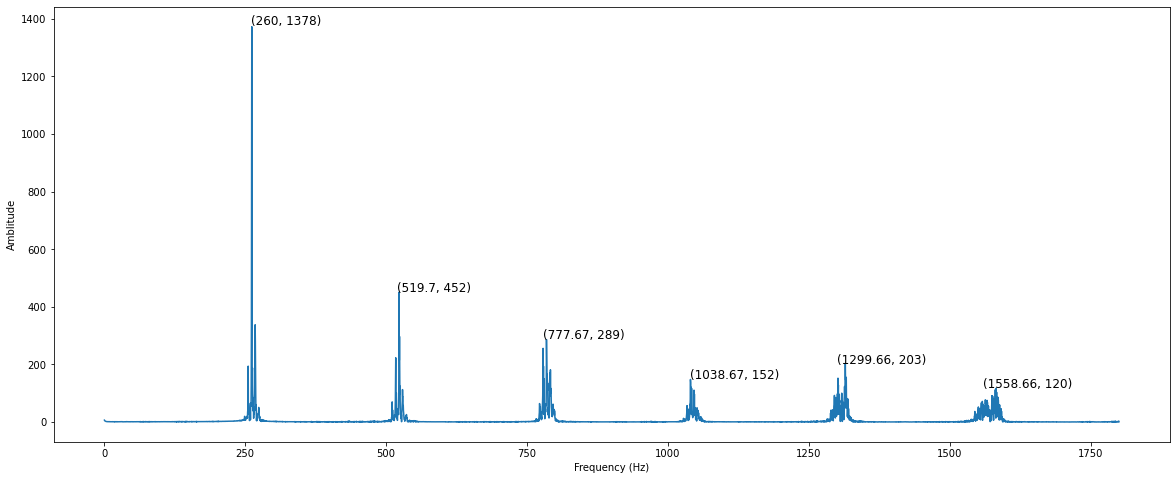

In [16]:
fig, ax = plt.subplots(figsize=(20,8))
condition = (fr >0) & (fr < 1800)
plt.plot(fr[condition],np.abs(c[condition]))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amblitude')
ax.text(260, 1378, '(260, 1378)', size=12)
ax.text(519.7, 452, '(519.7, 452)', size=12)
ax.text(777.67, 289, '(777.67, 289)', size=12)
ax.text(1038.67, 152, '(1038.67, 152)', size=12)
ax.text(1299.66, 203, '(1299.66, 203)', size=12)
ax.text(1558.66, 120, '(1558.66, 120)', size=12)

## Plot Frequency vs Phase graph

Text(1558.66, 3.02, '(1558.66, 3.02)')

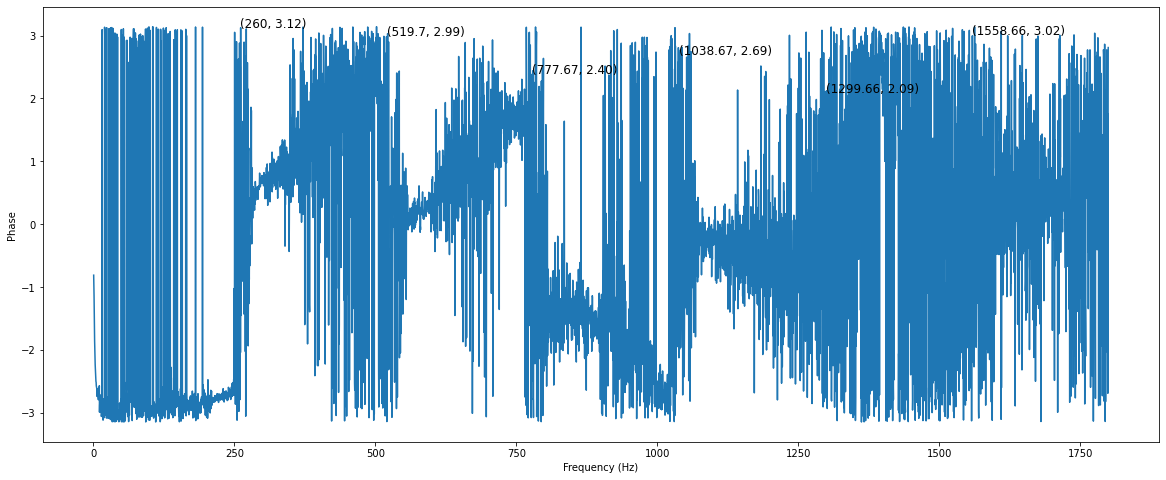

In [17]:
fig, ax = plt.subplots(figsize=(20,8))
condition = (fr >0) & (fr < 1800)
plt.plot(fr[condition],np.angle(c[condition]))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase')
ax.text(260, 3.12, '(260, 3.12)', size=12)
ax.text(519.7, 2.99, '(519.7, 2.99)', size=12)
ax.text(777.67, 2.40, '(777.67, 2.40)', size=12)
ax.text(1038.67, 2.69, '(1038.67, 2.69)', size=12)
ax.text(1299.66, 2.09, '(1299.66, 2.09)', size=12)
ax.text(1558.66, 3.02, '(1558.66, 3.02)', size=12)

### Zoomed frequency vs phase graph

Text(1558.66, 3.02, '(1558.66, 3.02)')

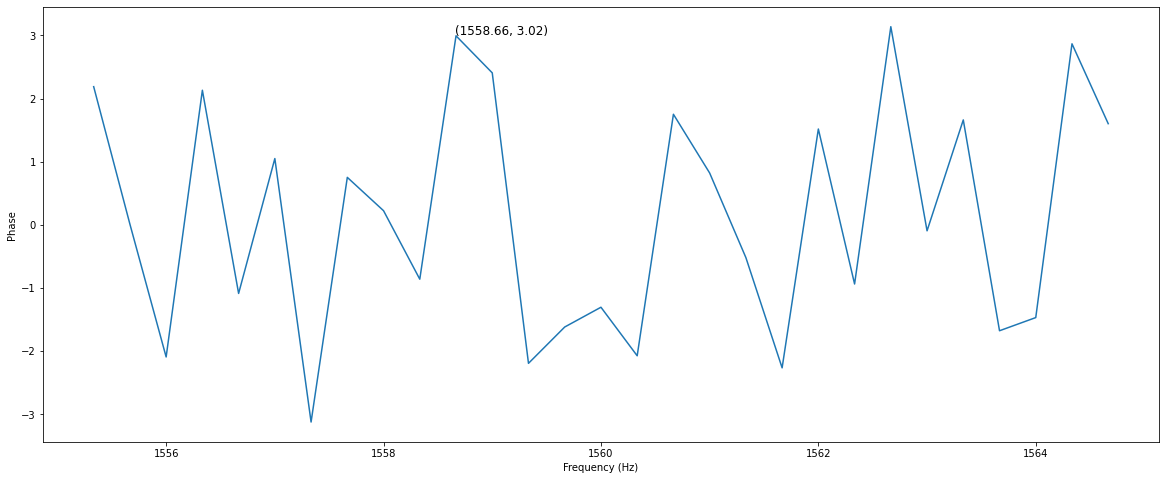

In [18]:
fig, ax = plt.subplots(figsize=(20,8))
condition = (fr >1555) & (fr < 1565)
plt.plot(fr[condition],np.angle(c[condition]))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase')
ax.text(1558.66, 3.02, '(1558.66, 3.02)', size=12)